# PET PROJECT. PYTHON

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [13]:
df=pd.read_csv(r'data.csv')
display(df.head())
display(df.info())

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,вВє 5.45 Lakh_,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,вВє 10 Lakh_,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,вВє 4.50 Lakh_,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,вВє 4.50 Lakh_,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,вВє 1.60 Lakh_,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16747 entries, 0 to 16746
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          16747 non-null  object 
 1   resale_price       16747 non-null  object 
 2   registered_year    16700 non-null  object 
 3   engine_capacity    16747 non-null  object 
 4   insurance          16740 non-null  object 
 5   transmission_type  16747 non-null  object 
 6   kms_driven         16747 non-null  object 
 7   owner_type         16706 non-null  object 
 8   fuel_type          16747 non-null  object 
 9   max_power          16747 non-null  object 
 10  seats              16746 non-null  float64
 11  mileage            16336 non-null  object 
 12  body_type          16747 non-null  object 
 13  city               16747 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.8+ MB


None

In [15]:
# первое задание
df['year_of_production']=df['full_name'].str.slice(0,4)
df['year_of_production']=df['year_of_production'].astype('int')
df['engine_capacity']=df['engine_capacity'].apply(lambda x: (re.findall(r'\d+',x))[0])
df['engine_capacity']=df['engine_capacity'].astype('int')
filtered_df=df[(df['year_of_production']>=2017) & (df['engine_capacity']<=2000)]
filtered_again=df[df['year_of_production']>=2017]
num_df=filtered_again.shape[0]
num=filtered_df.shape[0]
result1=round(num/num_df,2)
print('First task result: ',result1)

First task result:  0.92


Second task result:  1800351.1
0.9994558119286026


<Axes: xlabel='just_kms', ylabel='Count'>

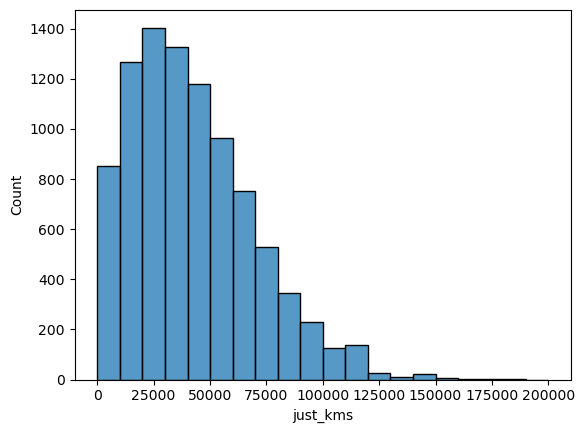

In [17]:
# второе задание
filtered_again=filtered_again.reset_index(drop=1)
filtered_again['just_price']=filtered_again['resale_price'].apply(lambda x: x.split(' ')[1])
filtered_again['just_price']=filtered_again['just_price'].astype('float')
filtered_again['price_units']=filtered_again['resale_price'].apply(lambda x: x.split(' ')[2])
for i in range(len(filtered_again)):
    if filtered_again.loc[i,'price_units']=='Lakh_':
        filtered_again.loc[i,'price_rub']=filtered_again.loc[i,'just_price']*100000*1.16
    else:
        filtered_again.loc[i,'price_rub']=filtered_again.loc[i,'just_price']*10000000*1.16
df1=filtered_again[filtered_again['year_of_production']==2022]
result2=round(df1['price_rub'].mean(),2)
print('Second task result: ',result2)

# третье задание
filtered_again['just_kms']=filtered_again['kms_driven'].apply(lambda x: re.findall(r'\d+',x))
filtered_again['just_kms']=filtered_again['just_kms'].apply(lambda x: ''.join(x)).astype('float')
print(filtered_again.query('just_kms <= 200000').shape[0]/filtered_again.shape[0])
sns.histplot(data=filtered_again.query('just_kms <= 200000'),x='just_kms',binwidth=10000, binrange=(0,200001))

In [19]:
# четвертое задание
filtered_again['year']=filtered_again['full_name'].apply(lambda x: x.split()[0])
filtered_again['year']=filtered_again['year'].astype('int')
filtered_again['name_auto']=filtered_again['full_name'].apply(lambda x: x[4:])
auto_2022_set=set(filtered_again.query('year>=2022')['name_auto'])
auto_pre_2022_set=set(filtered_again.query('year<2022')['name_auto'])
auto_2022_set_unique=auto_2022_set.difference(auto_pre_2022_set)
print('Fourth task result: ',len(auto_2022_set_unique))

Fourth task result:  286


In [21]:
# пятое задание
import math
filtered_again['max_power']=filtered_again['max_power'].astype('str')
filtered_again['just_power']=filtered_again['max_power'].apply(lambda x: re.findall(r'\d+',x))
filtered_again['just_power']=filtered_again['just_power'].apply(lambda x: '.'.join(x)).astype('float')

filtered_again['just_price']=filtered_again['resale_price'].apply(lambda x: x.split(' ')[1])
filtered_again['just_price']=filtered_again['just_price'].astype('float')
filtered_again['price_units']=filtered_again['resale_price'].apply(lambda x: x.split(' ')[2])
for i in range(len(filtered_again)):
    if filtered_again.loc[i,'price_units']=='Lakh_':
        filtered_again.loc[i,'price_rub']=filtered_again.loc[i,'just_price']*100000*1.16
    else:
        filtered_again.loc[i,'price_rub']=filtered_again.loc[i,'just_price']*10000000*1.16
filtered_again['just_kms']=filtered_again['kms_driven'].apply(lambda x: re.findall(r'\d+',x))
filtered_again['just_kms']=filtered_again['just_kms'].apply(lambda x: ''.join(x)).astype('float')
filtered_again.head()

def func(price, power, kms):
    return (math.log(price,2)*math.sqrt(power))/(math.log((kms/100),2))
filtered_again['index']=0

for i in range(len(filtered_again)):
    filtered_again.loc[i,'index']=func(filtered_again.loc[i,'price_rub'],filtered_again.loc[i,'just_power'],filtered_again.loc[i,'just_kms'])

result=round(filtered_again['index'].mean(),2)
print('Fifth rask result: ',result)

C:\Users\zeral\AppData\Local\Temp\ipykernel_19996\1812701940.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.322408578167654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_again.loc[i,'index']=func(filtered_again.loc[i,'price_rub'],filtered_again.loc[i,'just_power'],filtered_again.loc[i,'just_kms'])


Fifth rask result:  24.98
